In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Sigma of Gaussian f(x, t)
sigma = 0.05

x = np.linspace(0, 1, 100)

truth = np.sin(x * (2 * np.pi))

data = np.array([
    [0.00, 0.40],
    [0.11, 0.80],
    [0.22, 1.05],
    [0.33, 1.00],
    [0.44, 0.20],
    [0.55, 0.25],
    [0.66, -0.80],
    [0.77, -0.45],
    [0.88, -0.50],
    [1.00, 0.3],
])

In [3]:
def g(x):
    return 1. / np.sqrt(2 * np.pi) * np.exp(-0.5 * np.square(x / sigma))

kernel = np.array([g(x - d[0]) for d in data])
kernel /= kernel.sum(axis=0)

In [4]:
t = data[:, 1]
y = np.dot(t, kernel)

# Solve exercise 6.18
variance = np.dot(t * t + sigma * sigma, kernel) - np.square(y)
std = np.sqrt(variance)

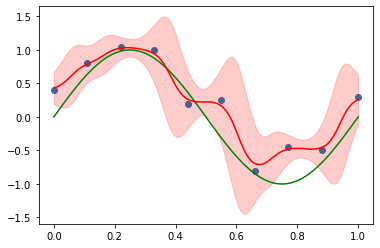

In [5]:
plt.scatter(data[:, 0], data[:, 1])
plt.plot(x, truth, color='g')
plt.plot(x, y, color='r')
plt.fill_between(x, y - 2 * std, y + 2 * std, color='r', alpha=0.2)